step 1.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Cài các thư viện cần thiết
!pip install torch torchvision
!pip install segmentation-models-pytorch
!pip install transformers datasets evaluate
!pip install albumentations
!pip install torchmetrics
!pip install segmentation_dataset
!pip install numpy
!pip install scikit-learn matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Reset runtime tự động (y như nhấn "Restart runtime")
import os
os.kill(os.getpid(), 9)


proseccing:check điểm ảnh trong tập test

In [ ]:

import numpy as np
from PIL import Image
import os

# Đường dẫn đến thư mục chứa ảnh mask của test set
mask_dir = '/content/gdrive/MyDrive/KLTN/Unet/data/val/masks'

# Tên lớp
class_names = {
    0: "Background",
    1: "Field",
    2: "Other"
}

# Khởi tạo bộ đếm tổng số pixel cho mỗi lớp
total_counts = {cls_id: 0 for cls_id in class_names.keys()}

# Duyệt qua tất cả tệp trong thư mục
for filename in os.listdir(mask_dir):
    if filename.endswith('.png'):
        mask_path = os.path.join(mask_dir, filename)
        mask = Image.open(mask_path).convert('L')  # Chuyển về grayscale 8-bit
        mask_array = np.array(mask)

        # Đếm số lượng pixel theo lớp
        unique, counts = np.unique(mask_array, return_counts=True)
        for cls_id, count in zip(unique, counts):
            if cls_id in total_counts:
                total_counts[cls_id] += count
            else:
                total_counts[cls_id] = count  # Trường hợp lớp ngoài dự kiến

# In kết quả
print("=== Phân bố lớp trong tập test ===")
for cls_id, count in total_counts.items():
    class_name = class_names.get(cls_id, "Unknown")
    print(f"Class {cls_id} ({class_name}): {count} pixels")



=== Phân bố lớp trong tập test ===
Class 0 (Background): 241507 pixels
Class 1 (Field): 21337364 pixels
Class 2 (Other): 9141129 pixels


train: Deeplabv3 + Resnet50

Epoch 1/10 [Train]: 100%|██████████| 58/58 [03:23<00:00,  3.50s/it]


[Epoch 1] Train Loss: 0.7175


Epoch 1/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.7849 | F1-score: 0.8526
field        → Acc: 0.7849 | F1: 0.8526
Class 2 → Accuracy: 0.8833 | F1-score: 0.7371
other        → Acc: 0.8833 | F1: 0.7371


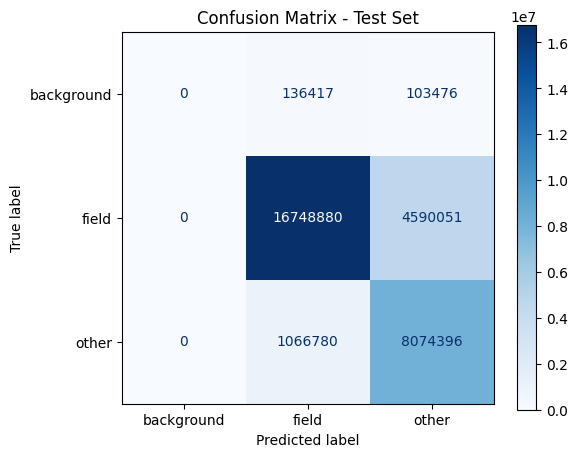

Epoch 2/10 [Train]: 100%|██████████| 58/58 [03:23<00:00,  3.50s/it]


[Epoch 2] Train Loss: 0.4372


Epoch 2/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.69it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.8321 | F1-score: 0.8714
field        → Acc: 0.8321 | F1: 0.8714
Class 2 → Accuracy: 0.8346 | F1-score: 0.7461
other        → Acc: 0.8346 | F1: 0.7461


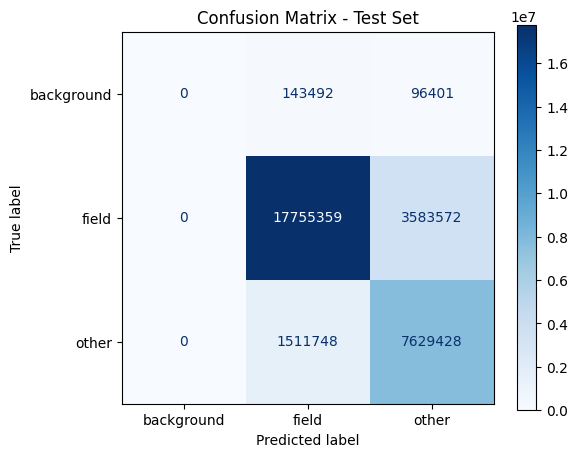

Epoch 3/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.50s/it]


[Epoch 3] Train Loss: 0.4019


Epoch 3/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy: 0.0208 | F1-score: 0.0237
background   → Acc: 0.0208 | F1: 0.0237
Class 1 → Accuracy: 0.8721 | F1-score: 0.9046
field        → Acc: 0.8721 | F1: 0.9046
Class 2 → Accuracy: 0.8764 | F1-score: 0.8063
other        → Acc: 0.8764 | F1: 0.8063


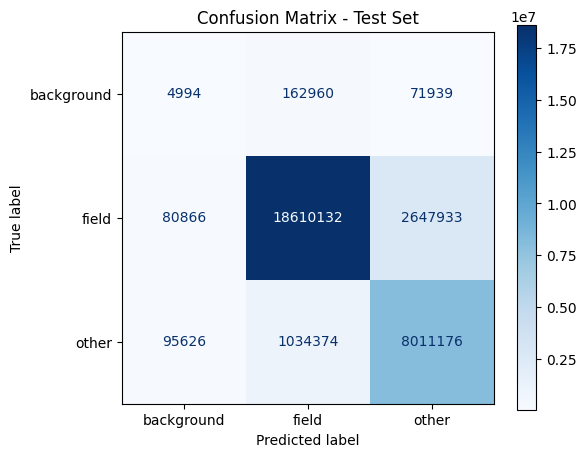

Epoch 4/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 4] Train Loss: 0.3586


Epoch 4/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy: 0.0296 | F1-score: 0.0423
background   → Acc: 0.0296 | F1: 0.0423
Class 1 → Accuracy: 0.9290 | F1-score: 0.9162
field        → Acc: 0.9290 | F1: 0.9162
Class 2 → Accuracy: 0.7820 | F1-score: 0.8018
other        → Acc: 0.7820 | F1: 0.8018


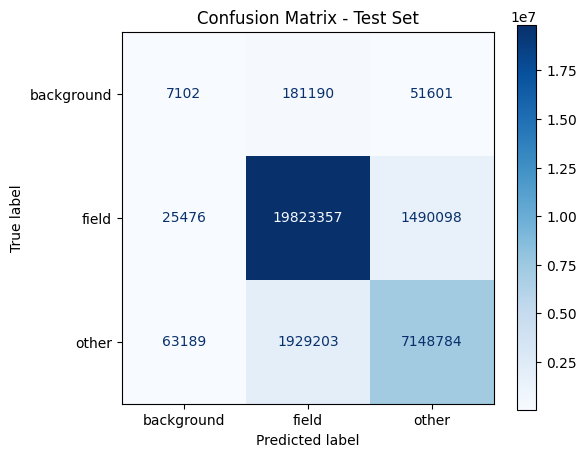

Epoch 5/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 5] Train Loss: 0.3340


Epoch 5/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy: 0.0220 | F1-score: 0.0323
background   → Acc: 0.0220 | F1: 0.0323
Class 1 → Accuracy: 0.8642 | F1-score: 0.8943
field        → Acc: 0.8642 | F1: 0.8943
Class 2 → Accuracy: 0.8515 | F1-score: 0.7834
other        → Acc: 0.8515 | F1: 0.7834


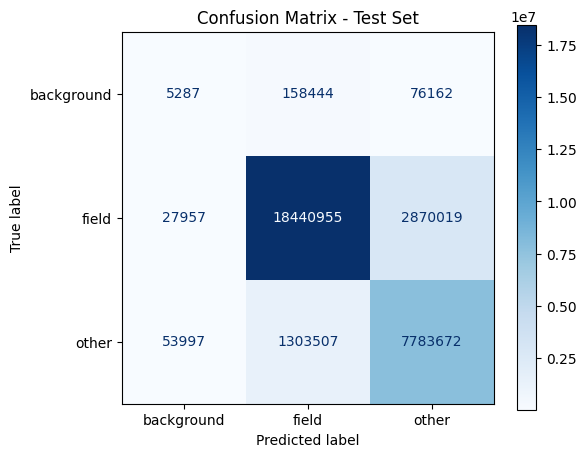

Epoch 6/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.50s/it]


[Epoch 6] Train Loss: 0.3097


Epoch 6/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy: 0.0228 | F1-score: 0.0345
background   → Acc: 0.0228 | F1: 0.0345
Class 1 → Accuracy: 0.9034 | F1-score: 0.9134
field        → Acc: 0.9034 | F1: 0.9134
Class 2 → Accuracy: 0.8400 | F1-score: 0.8120
other        → Acc: 0.8400 | F1: 0.8120


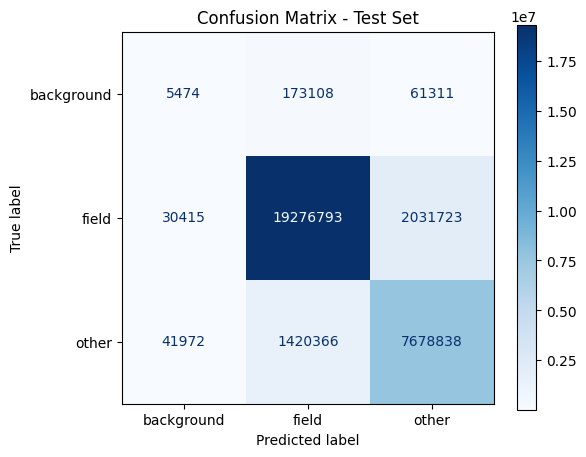

Epoch 7/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 7] Train Loss: 0.2809


Epoch 7/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]


Class 0 → Accuracy: 0.0150 | F1-score: 0.0260
background   → Acc: 0.0150 | F1: 0.0260
Class 1 → Accuracy: 0.9442 | F1-score: 0.9474
field        → Acc: 0.9442 | F1: 0.9474
Class 2 → Accuracy: 0.9034 | F1-score: 0.8866
other        → Acc: 0.9034 | F1: 0.8866


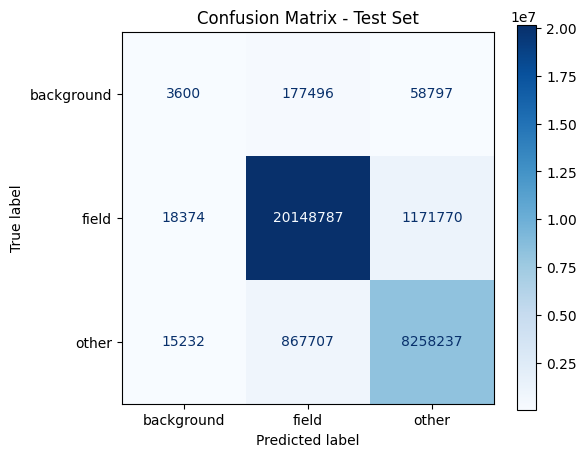

Epoch 8/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 8] Train Loss: 0.2473


Epoch 8/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy: 0.0125 | F1-score: 0.0242
background   → Acc: 0.0125 | F1: 0.0242
Class 1 → Accuracy: 0.9425 | F1-score: 0.9429
field        → Acc: 0.9425 | F1: 0.9429
Class 2 → Accuracy: 0.8855 | F1-score: 0.8735
other        → Acc: 0.8855 | F1: 0.8735


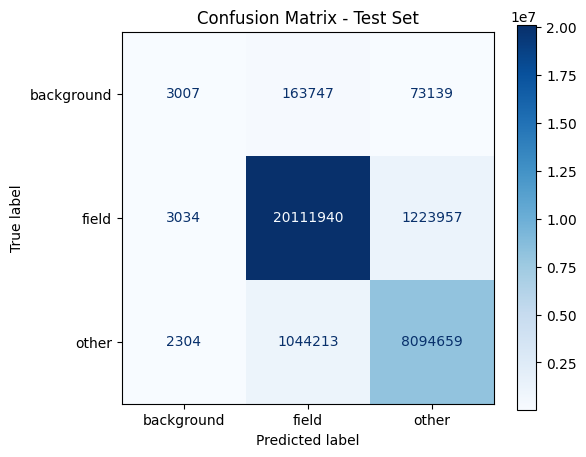

Epoch 9/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 9] Train Loss: 0.2348


Epoch 9/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]


Class 0 → Accuracy: 0.0272 | F1-score: 0.0434
background   → Acc: 0.0272 | F1: 0.0434
Class 1 → Accuracy: 0.9560 | F1-score: 0.9547
field        → Acc: 0.9560 | F1: 0.9547
Class 2 → Accuracy: 0.9072 | F1-score: 0.9012
other        → Acc: 0.9072 | F1: 0.9012


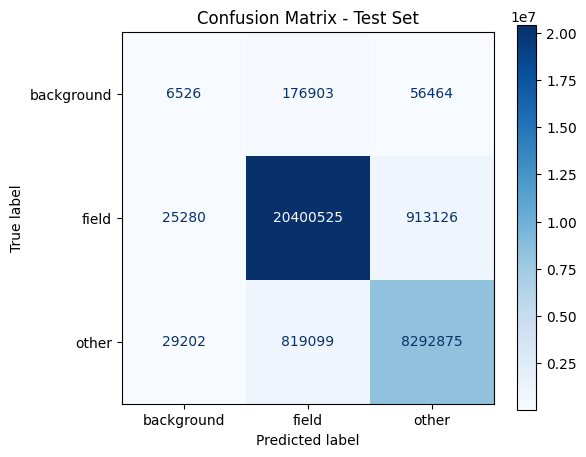

Epoch 10/10 [Train]: 100%|██████████| 58/58 [03:22<00:00,  3.49s/it]


[Epoch 10] Train Loss: 0.2300


Epoch 10/10 [Val]: 100%|██████████| 25/25 [00:14<00:00,  1.70it/s]


Class 0 → Accuracy: 0.0314 | F1-score: 0.0474
background   → Acc: 0.0314 | F1: 0.0474
Class 1 → Accuracy: 0.9043 | F1-score: 0.9287
field        → Acc: 0.9043 | F1: 0.9287
Class 2 → Accuracy: 0.9133 | F1-score: 0.8534
other        → Acc: 0.9133 | F1: 0.8534


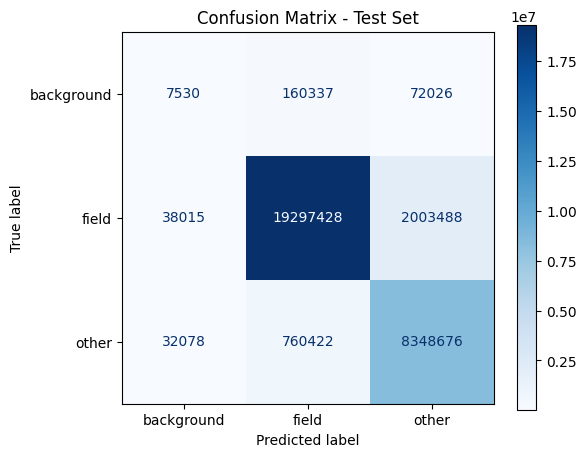

Epoch 10/10 [Test]: 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Class 0 → Accuracy test: 0.0250 | F1-score: 0.0341
background   → Acc test: 0.0250 | F1: 0.0341
Class 1 → Accuracy test: 0.8806 | F1-score: 0.9096
field        → Acc test: 0.8806 | F1: 0.9096
Class 2 → Accuracy test: 0.8372 | F1-score: 0.7583
other        → Acc test: 0.8372 | F1: 0.7583


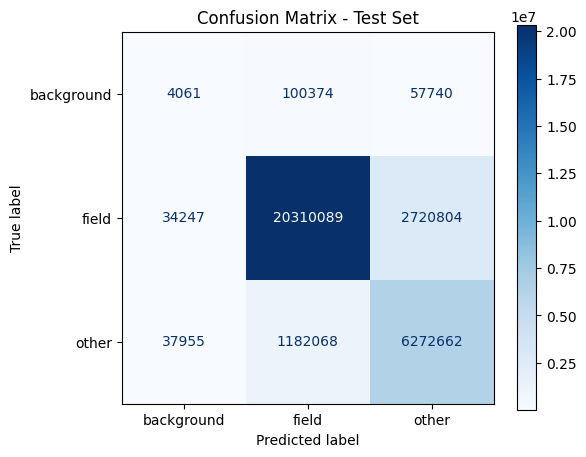

In [ ]:
import torch
import torchvision.transforms as T
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50
from torchmetrics.classification import MulticlassJaccardIndex
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import os
import torchvision.transforms as T
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, target_size=(960, 1280)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_list = sorted(os.listdir(image_dir))
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.image_list[idx].replace('.jpg', '.png'))

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        # Resize image and mask
        image = image.resize(self.target_size, Image.BILINEAR)
        mask = mask.resize(self.target_size, Image.NEAREST)

        if self.transform:
            image = self.transform(image)

        mask = np.array(mask)  # chuyển mask thành numpy array
        mask = torch.from_numpy(mask).long()  # chuyển mask thành tensor
        return image, mask


# ⚙️ Config
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_CLASSES = 3
BATCH_SIZE = 1
EPOCHS = 10

# Cân bằng trọng số cho từng lớp (Field: 1.0, Other: 10.0, Background: 5.0)
class_weights = torch.tensor([1.0, 1.0, 1.0]).to(DEVICE)

# 📦 Datasets
transform = T.Compose([
    T.Resize((1280, 960)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(30),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

train_ds = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/train/images", "/content/gdrive/MyDrive/KLTN/Unet/data/train/masks", transform=transform)
val_ds   = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/val/images", "/content/gdrive/MyDrive/KLTN/Unet/data/val/masks", transform=transform)
test_ds  = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/test/images", "/content/gdrive/MyDrive/KLTN/Unet/data/test/masks", transform=transform)

train_loader = DataLoader(
    train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=2,       # hoặc 0 nếu dùng Windows
    pin_memory=True,
    drop_last=True       # 🔥 dòng quan trọng nhất để fix bug của bạn
)

val_loader = DataLoader(val_ds, batch_size=1)

test_loader = DataLoader(test_ds, batch_size=1)
# 🧠 Model
model = deeplabv3_resnet50(pretrained=False, num_classes=NUM_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 🔥 Sử dụng CrossEntropyLoss với trọng số cho các lớp
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# 📊 Metrics
iou_metric = MulticlassJaccardIndex(num_classes=NUM_CLASSES).to(DEVICE)
accuracy_metric = MulticlassAccuracy(num_classes=NUM_CLASSES, average=None).to(DEVICE)
f1_metric = MulticlassF1Score(num_classes=NUM_CLASSES, average=None).to(DEVICE)

# 🔁 Training
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)

        out = model(images)['out'].to(DEVICE)  # đầu ra của model
        out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = F.softmax(out, dim=1).argmax(1)  # tìm nhãn có xác suất cao nhất

        loss = criterion(out, masks)  # Sử dụng CrossEntropyLoss với trọng số cho các lớp

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # In các nhãn duy nhất trong predicted labels


    print(f"[Epoch {epoch+1}] Train Loss: {total_loss/len(train_loader):.4f}")

    # 🔍 Validation
    accuracy_metric.reset()
    f1_metric.reset()

    all_preds = []
    all_targets = []

    model.eval()
    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            out = model(images)['out'].to(DEVICE)  # [B, C, H, W]
            out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
            preds = F.softmax(out, dim=1).argmax(1)  # [B, H, W]

            # Flatten về [B*H*W] để tính đúng
            accuracy_metric.update(preds.view(-1), masks.view(-1))
            f1_metric.update(preds.view(-1), masks.view(-1))

            all_preds.append(preds.view(-1).cpu())
            all_targets.append(masks.view(-1).cpu())

    # Kết quả từng lớp
    val_acc_per_class = accuracy_metric.compute()
    val_f1_per_class = f1_metric.compute()

    # In từng lớp
    CLASS_NAMES = ["background", "field", "other"]
    for i in range(NUM_CLASSES):
        print(f"Class {i} → Accuracy: {val_acc_per_class[i]:.4f} | F1-score: {val_f1_per_class[i]:.4f}")
        print(f"{CLASS_NAMES[i]:<12} → Acc: {val_acc_per_class[i]:.4f} | F1: {val_f1_per_class[i]:.4f}")


    all_preds_flat = torch.cat(all_preds).numpy()
    all_targets_flat = torch.cat(all_targets).numpy()
    cm = confusion_matrix(all_targets_flat, all_preds_flat, labels=list(range(NUM_CLASSES)))

    # Vẽ confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title("Confusion Matrix - Test Set")
    plt.show()



# Lưu checkpoint (trọng số mô hình, optimizer, epoch)
checkpoint = {
    'epoch': 10,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}

torch.save(checkpoint, 'deeplabv3_checkpoint.pth')

accuracy_metric.reset()
f1_metric.reset()

all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for images, masks in tqdm(test_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Test]"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)
        out = model(images)['out'].to(DEVICE)  # [B, C, H, W]
        out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = F.softmax(out, dim=1).argmax(1)  # [B, H, W]

        # Flatten về [B*H*W] để tính đúng
        accuracy_metric.update(preds.view(-1), masks.view(-1))
        f1_metric.update(preds.view(-1), masks.view(-1))

        # Lưu để vẽ confusion matrix
        all_preds.append(preds.view(-1).cpu())
        all_targets.append(masks.view(-1).cpu())

# Kết quả từng lớp
val_acc_per_class = accuracy_metric.compute()
val_f1_per_class = f1_metric.compute()

# In từng lớp
CLASS_NAMES = ["background", "field", "other"]
for i in range(NUM_CLASSES):
    print(f"Class {i} → Accuracy test: {val_acc_per_class[i]:.4f} | F1-score: {val_f1_per_class[i]:.4f}")
    print(f"{CLASS_NAMES[i]:<12} → Acc test: {val_acc_per_class[i]:.4f} | F1: {val_f1_per_class[i]:.4f}")



# Gộp dự đoán và nhãn thành vector 1D
all_preds_flat = torch.cat(all_preds).numpy()
all_targets_flat = torch.cat(all_targets).numpy()

# Tính confusion matrix
cm = confusion_matrix(all_targets_flat, all_preds_flat, labels=list(range(NUM_CLASSES)))

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()



Train: Deeplabv3 + resnet101

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Epoch 1/10 [Train]: 100%|██████████| 116/116 [04:20<00:00,  2.24s/it]


[Epoch 1] Train Loss: 0.5215


Epoch 1/10 [Val]: 100%|██████████| 25/25 [00:50<00:00,  2.02s/it]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9060 | F1-score: 0.8157
field        → Acc: 0.9060 | F1: 0.8157
Class 2 → Accuracy: 0.2867 | F1-score: 0.3798
other        → Acc: 0.2867 | F1: 0.3798


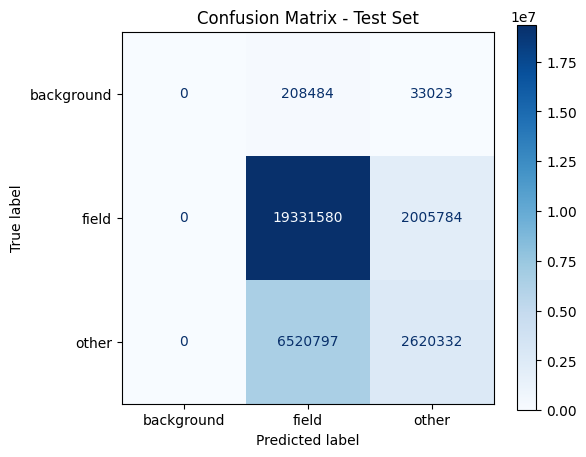

Epoch 2/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 2] Train Loss: 0.4905


Epoch 2/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9090 | F1-score: 0.8164
field        → Acc: 0.9090 | F1: 0.8164
Class 2 → Accuracy: 0.2812 | F1-score: 0.3756
other        → Acc: 0.2812 | F1: 0.3756


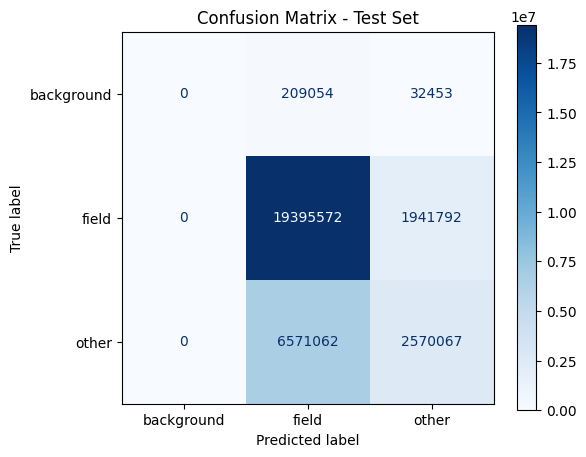

Epoch 3/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 3] Train Loss: 0.4612


Epoch 3/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9485 | F1-score: 0.8269
field        → Acc: 0.9485 | F1: 0.8269
Class 2 → Accuracy: 0.2169 | F1-score: 0.3238
other        → Acc: 0.2169 | F1: 0.3238


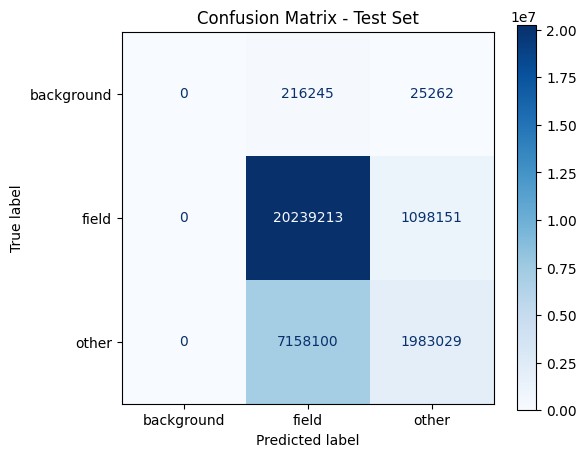

Epoch 4/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 4] Train Loss: 0.4627


Epoch 4/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.25it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9022 | F1-score: 0.8515
field        → Acc: 0.9022 | F1: 0.8515
Class 2 → Accuracy: 0.5152 | F1-score: 0.5893
other        → Acc: 0.5152 | F1: 0.5893


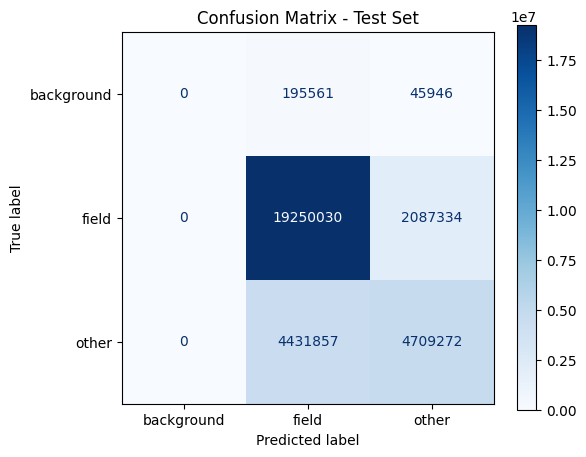

Epoch 5/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 5] Train Loss: 0.4128


Epoch 5/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9249 | F1-score: 0.8778
field        → Acc: 0.9249 | F1: 0.8778
Class 2 → Accuracy: 0.5956 | F1-score: 0.6709
other        → Acc: 0.5956 | F1: 0.6709


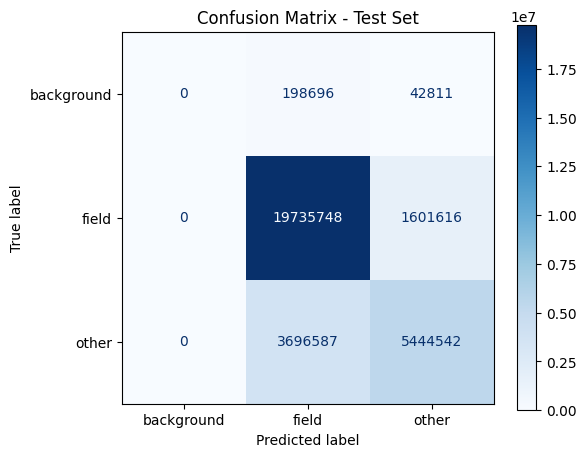

Epoch 6/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 6] Train Loss: 0.3825


Epoch 6/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9001 | F1-score: 0.8580
field        → Acc: 0.9001 | F1: 0.8580
Class 2 → Accuracy: 0.5590 | F1-score: 0.6221
other        → Acc: 0.5590 | F1: 0.6221


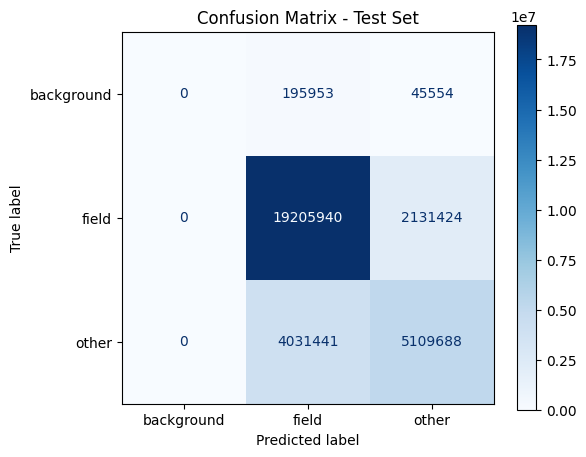

Epoch 7/10 [Train]: 100%|██████████| 116/116 [04:21<00:00,  2.25s/it]


[Epoch 7] Train Loss: 0.3755


Epoch 7/10 [Val]: 100%|██████████| 25/25 [00:19<00:00,  1.26it/s]


Class 0 → Accuracy: 0.0000 | F1-score: 0.0000
background   → Acc: 0.0000 | F1: 0.0000
Class 1 → Accuracy: 0.9125 | F1-score: 0.8949
field        → Acc: 0.9125 | F1: 0.8949
Class 2 → Accuracy: 0.7254 | F1-score: 0.7498
other        → Acc: 0.7254 | F1: 0.7498


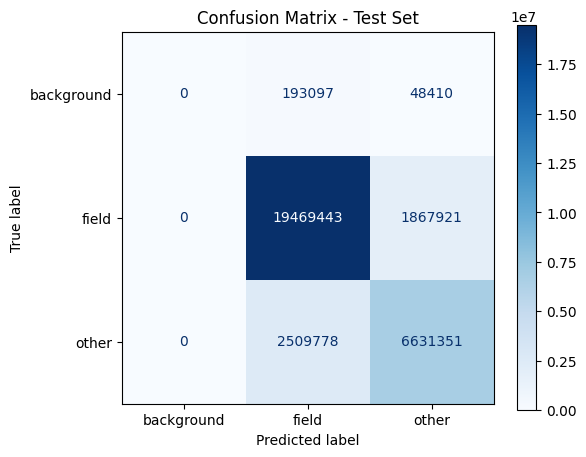

Epoch 8/10 [Train]:  27%|██▋       | 31/116 [01:10<03:10,  2.25s/it]

In [ ]:
import torch
import torchvision.transforms as T
from tqdm import tqdm
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet101
from torchmetrics.classification import MulticlassJaccardIndex
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset
from PIL import Image
import os
import torchvision.transforms as T
from torchmetrics.classification import MulticlassAccuracy, MulticlassF1Score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, target_size=(1280, 960)):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_list = sorted(os.listdir(image_dir))
        self.transform = transform
        self.target_size = target_size

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.image_list[idx].replace('.jpg', '.png'))

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        # Resize image and mask
        image = image.resize(self.target_size, Image.BILINEAR)
        mask = mask.resize(self.target_size, Image.NEAREST)


        if self.transform:
            image = self.transform(image)

        mask = np.array(mask)  # chuyển mask thành numpy array
        mask = torch.from_numpy(mask).long()  # chuyển mask thành tensor
        return image, mask


# ⚙️ Config
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_CLASSES = 3
BATCH_SIZE = 1
EPOCHS = 10

# Cân bằng trọng số cho từng lớp (Field: 1.0, Other: 10.0, Background: 5.0)
class_weights = torch.tensor([1.0, 1.0, 1.0]).to(DEVICE)

# 📦 Datasets
transform = T.Compose([
    T.Resize((960, 1280)),
    T.RandomHorizontalFlip(),
    T.RandomRotation(30),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

train_ds = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/train/images", "/content/gdrive/MyDrive/KLTN/Unet/data/train/masks", transform=transform)
val_ds   = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/val/images", "/content/gdrive/MyDrive/KLTN/Unet/data/val/masks", transform=transform)
test_ds  = SegmentationDataset("/content/gdrive/MyDrive/KLTN/Unet/data/test/images", "/content/gdrive/MyDrive/KLTN/Unet/data/test/masks", transform=transform)

train_loader = DataLoader(
    train_ds,
    batch_size=1,
    shuffle=True,
    num_workers=2,       # hoặc 0 nếu dùng Windows
    pin_memory=True,
    drop_last=True       # 🔥 dòng quan trọng nhất để fix bug của bạn
)

val_loader = DataLoader(val_ds, batch_size=1)

test_loader = DataLoader(test_ds, batch_size=1)
# 🧠 Model
def convert_batchnorm_to_groupnorm(module):
    for name, child in module.named_children():
        if isinstance(child, torch.nn.BatchNorm2d):
            setattr(module, name, torch.nn.GroupNorm(num_groups=32, num_channels=child.num_features))
        else:
            convert_batchnorm_to_groupnorm(child)
    return module

model = deeplabv3_resnet101(pretrained=False, num_classes=NUM_CLASSES)
model = convert_batchnorm_to_groupnorm(model)
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# 🔥 Sử dụng CrossEntropyLoss với trọng số cho các lớp
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)

# 📊 Metrics
iou_metric = MulticlassJaccardIndex(num_classes=NUM_CLASSES).to(DEVICE)
accuracy_metric = MulticlassAccuracy(num_classes=NUM_CLASSES, average=None).to(DEVICE)
f1_metric = MulticlassF1Score(num_classes=NUM_CLASSES, average=None).to(DEVICE)

# 🔁 Training
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for images, masks in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)

        out = model(images)['out'].to(DEVICE)  # đầu ra của model
        out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = F.softmax(out, dim=1).argmax(1)  # tìm nhãn có xác suất cao nhất

        loss = criterion(out, masks)  # Sử dụng CrossEntropyLoss với trọng số cho các lớp

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # In các nhãn duy nhất trong predicted labels


    print(f"[Epoch {epoch+1}] Train Loss: {total_loss/len(train_loader):.4f}")

    # 🔍 Validation
    accuracy_metric.reset()
    f1_metric.reset()

    all_preds = []
    all_targets = []

    model.eval()
    with torch.no_grad():
        for images, masks in tqdm(val_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Val]"):
            images, masks = images.to(DEVICE), masks.to(DEVICE)
            out = model(images)['out'].to(DEVICE)  # [B, C, H, W]
            out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
            preds = F.softmax(out, dim=1).argmax(1)  # [B, H, W]

            # Flatten về [B*H*W] để tính đúng
            accuracy_metric.update(preds.view(-1), masks.view(-1))
            f1_metric.update(preds.view(-1), masks.view(-1))

            all_preds.append(preds.view(-1).cpu())
            all_targets.append(masks.view(-1).cpu())

    # Kết quả từng lớp
    val_acc_per_class = accuracy_metric.compute()
    val_f1_per_class = f1_metric.compute()

    # In từng lớp
    CLASS_NAMES = ["background", "field", "other"]
    for i in range(NUM_CLASSES):
        print(f"Class {i} → Accuracy: {val_acc_per_class[i]:.4f} | F1-score: {val_f1_per_class[i]:.4f}")
        print(f"{CLASS_NAMES[i]:<12} → Acc: {val_acc_per_class[i]:.4f} | F1: {val_f1_per_class[i]:.4f}")


    all_preds_flat = torch.cat(all_preds).numpy()
    all_targets_flat = torch.cat(all_targets).numpy()
    cm = confusion_matrix(all_targets_flat, all_preds_flat, labels=list(range(NUM_CLASSES)))

    # Vẽ confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title("Confusion Matrix - Test Set")
    plt.show()



# Lưu checkpoint (trọng số mô hình, optimizer, epoch)
checkpoint = {
    'epoch': 10,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}

torch.save(checkpoint, 'deeplabv3_checkpoint.pth')

accuracy_metric.reset()
f1_metric.reset()

all_preds = []
all_targets = []

model.eval()
with torch.no_grad():
    for images, masks in tqdm(test_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Test]"):
        images, masks = images.to(DEVICE), masks.to(DEVICE)
        out = model(images)['out'].to(DEVICE)  # [B, C, H, W]
        out = F.interpolate(out, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = F.softmax(out, dim=1).argmax(1)  # [B, H, W]

        # Flatten về [B*H*W] để tính đúng
        accuracy_metric.update(preds.view(-1), masks.view(-1))
        f1_metric.update(preds.view(-1), masks.view(-1))

        # Lưu để vẽ confusion matrix
        all_preds.append(preds.view(-1).cpu())
        all_targets.append(masks.view(-1).cpu())

# Kết quả từng lớp
val_acc_per_class = accuracy_metric.compute()
val_f1_per_class = f1_metric.compute()

# In từng lớp
CLASS_NAMES = ["background", "field", "other"]
for i in range(NUM_CLASSES):
    print(f"Class {i} → Accuracy test: {val_acc_per_class[i]:.4f} | F1-score: {val_f1_per_class[i]:.4f}")
    print(f"{CLASS_NAMES[i]:<12} → Acc test: {val_acc_per_class[i]:.4f} | F1: {val_f1_per_class[i]:.4f}")



# Gộp dự đoán và nhãn thành vector 1D
all_preds_flat = torch.cat(all_preds).numpy()
all_targets_flat = torch.cat(all_targets).numpy()

# Tính confusion matrix
cm = confusion_matrix(all_targets_flat, all_preds_flat, labels=list(range(NUM_CLASSES)))

# Vẽ confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Test Set")
plt.show()

